In [ ]:
%pip install pandas

In [ ]:
%pip install pyarrow

In [ ]:
import pandas as pd

# Specify the path to your Parquet file
parquet_file_path = '/Users/jenn/Downloads/train-00000-of-00001.parquet' 

    # Specify the path for the output CSV file
csv_file_path = '/Users/jenn/Downloads/Review.csv'
    # Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

    # Convert the DataFrame to a CSV file
    # index=False prevents Pandas from writing the DataFrame index as a column in the CSV
df.to_csv(csv_file_path, index=False)

print(f"Successfully converted '{parquet_file_path}' to '{csv_file_path}'")


In [3]:
# Import dataset
import pandas as pd
data = pd.read_csv('/Users/jenn/Downloads/Review.csv')
print(data.head())

                                         review_text  review_score  \
0  I like LocoRoco 2 better than the first, the m...           100   
1  Need for Speed: World could have been a great ...            30   
2  Decent game but Fairly short Pretty hard Overp...            60   
3  The game looks like a great game I have been w...           100   
4  This game is REALLY bad! Everything is out of ...             0   

  review_category  
0        positive  
1        negative  
2           mixed  
3        positive  
4        negative  


In [4]:
data.dtypes

review_text        object
review_score        int64
review_category    object
dtype: object

In [5]:
data.shape

(629884, 3)

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
review_text        0
review_score       0
review_category    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [14]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


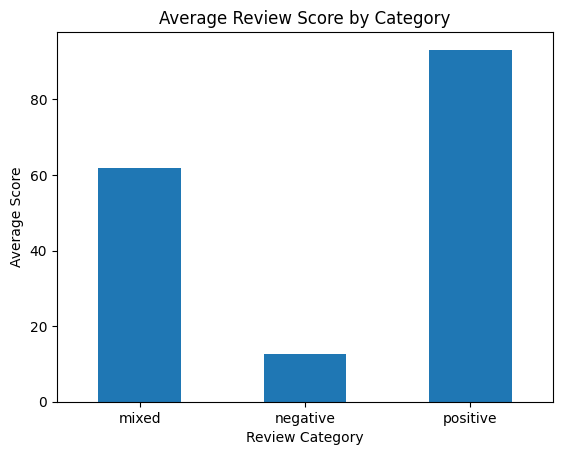

In [8]:
# Simple EDA - Plot the distribution of review_category
import matplotlib.pyplot as plt

data.groupby("review_category")["review_score"].mean().plot(kind="bar")
plt.title("Average Review Score by Category")
plt.xlabel("Review Category")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


In [21]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [10]:
# Data Preprocessing
# Removing stop words and punctuation

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation & special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # tokenisation
    tokens = nltk.word_tokenize(text)
    
    # remove stopwords & stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)


In [11]:
import nltk
import re

data['clean_review'] = data['review_text'].apply(preprocess_text)


In [13]:
# Label Encoding

review_order = {'negative': 0, 'mixed': 1, 'positive': 2}
data['review_category_encoded'] = data['review_category'].map(review_order)
print(data)

                                              review_text  review_score  \
0       I like LocoRoco 2 better than the first, the m...           100   
1       Need for Speed: World could have been a great ...            30   
2       Decent game but Fairly short Pretty hard Overp...            60   
3       The game looks like a great game I have been w...           100   
4       This game is REALLY bad! Everything is out of ...             0   
...                                                   ...           ...   
629879  Best game in my life... Best best best best be...           100   
629880  When I was around eight years old or so, my br...           100   
629881  Best Far Cry game since Far Cry 3, but not man...            70   
629882  I think that is game is a solid improvement fr...            90   
629883  This takes the worst parts of an mmo and JRPG ...            30   

       review_category                                       clean_review  \
0             positive

In [14]:
# Variable assignment
x = data['clean_review']
y = data['review_category_encoded']

In [15]:
# Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y) 

# Train and Test shape
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (440918,)
x_test shape: (188966,)
y_train shape: (440918,)
y_test shape: (188966,)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


review_category_encoded
2    368669
0    159847
1    101368
Name: count, dtype: int64


<Axes: xlabel='review_category', ylabel='count'>

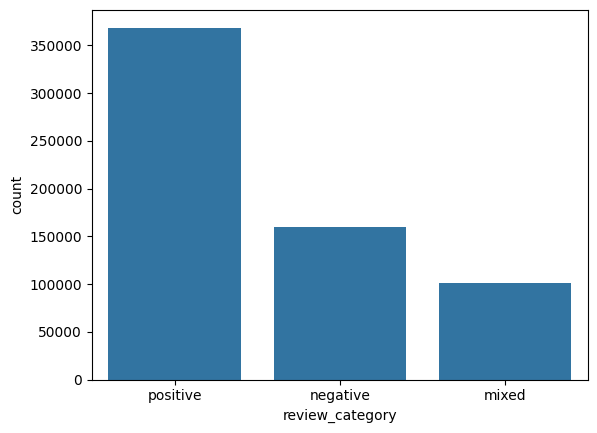

In [17]:
# Value counts
print(data['review_category_encoded'].value_counts())

import seaborn as sns
sns.countplot(x = data['review_category'])

In [19]:
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='review_category_encoded', ylabel='count'>

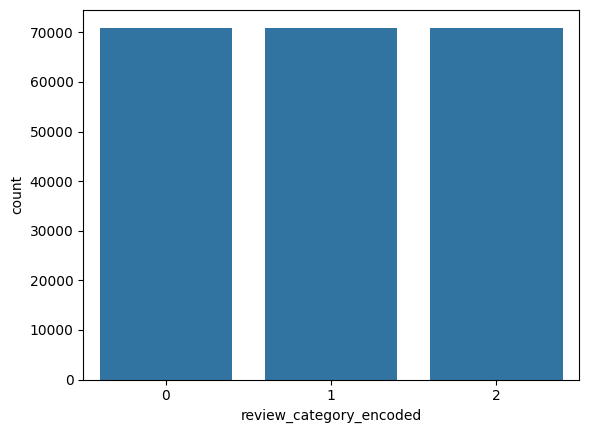

In [18]:
# Class Balancing using Undersampling

from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x_train_vec, y_train)
sns.countplot(x = y_nm)

In [20]:
# Logistic Regression Model (draft)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lr = LogisticRegression(max_iter=1000)
lr.fit(x_nm, y_nm)
y_pred = lr.predict(x_test_vec)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))    

Confusion Matrix:
[[37701  8231  2022]
 [ 5602 19513  5296]
 [ 5111 18912 86578]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     47954
           1       0.42      0.64      0.51     30411
           2       0.92      0.78      0.85    110601

    accuracy                           0.76    188966
   macro avg       0.71      0.74      0.71    188966
weighted avg       0.80      0.76      0.78    188966

Accuracy Score: 0.7609411216832658


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1_macro'
)

grid.fit(x_nm, y_nm)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'penalty': 'l2'}


In [54]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test_vec)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.78      0.79      0.78     47954
           1       0.42      0.64      0.51     30411
           2       0.92      0.78      0.85    110601

    accuracy                           0.76    188966
   macro avg       0.71      0.74      0.71    188966
weighted avg       0.80      0.76      0.78    188966



In [32]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jenn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

MNB_classifier = MultinomialNB().fit(x_train_vec, y_train) # MODEL BUILDING
predicted_MNB = MNB_classifier.predict(x_test_vec) # Prediction
print("F1 Score of MNB:", f1_score(y_test, predicted_MNB, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_MNB))

F1 Score of MNB: 0.7142551683576644
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74     47954
           1       0.57      0.11      0.19     30411
           2       0.75      0.97      0.85    110601

    accuracy                           0.76    188966
   macro avg       0.71      0.59      0.59    188966
weighted avg       0.74      0.76      0.71    188966



In [ ]:
# SVC Classifier from Sklearn
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

SVC_classifier = SVC(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_SVC= SVC_classifier.predict(x_test_vec)
print("F1 Score of SVC:", f1_score(y_test, predicted_SVC, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_SVC))

In [19]:
# Random Forest Classifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

RF_classifier = RandomForestClassifier(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_RF = RF_classifier.predict(x_test_vec)
print("F1 Score of RF:", f1_score(y_test, predicted_RF, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_RF))

F1 Score of RF: 0.716781474409914
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     47954
           1       0.57      0.11      0.19     30411
           2       0.76      0.96      0.85    110601

    accuracy                           0.76    188966
   macro avg       0.70      0.60      0.60    188966
weighted avg       0.74      0.76      0.72    188966

